# Time Series Forecasting with ARIMA (Rolling Forecast)
This notebook demonstrates time series forecasting for AAPL stock using a rolling (walk-forward) ARIMA approach. The model is updated step-by-step with each new actual value from the test set, resulting in more realistic predictions.

Rolling ARIMA: Fit repeatedly, update with each new actual value, predict one step ahead each time.


In [15]:
# Install required packages if not already installed
!pip install yfinance statsmodels matplotlib scikit-learn --quiet


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## 1. Load AAPL Stock Data from Yahoo Finance

/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_29551/397873123.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed



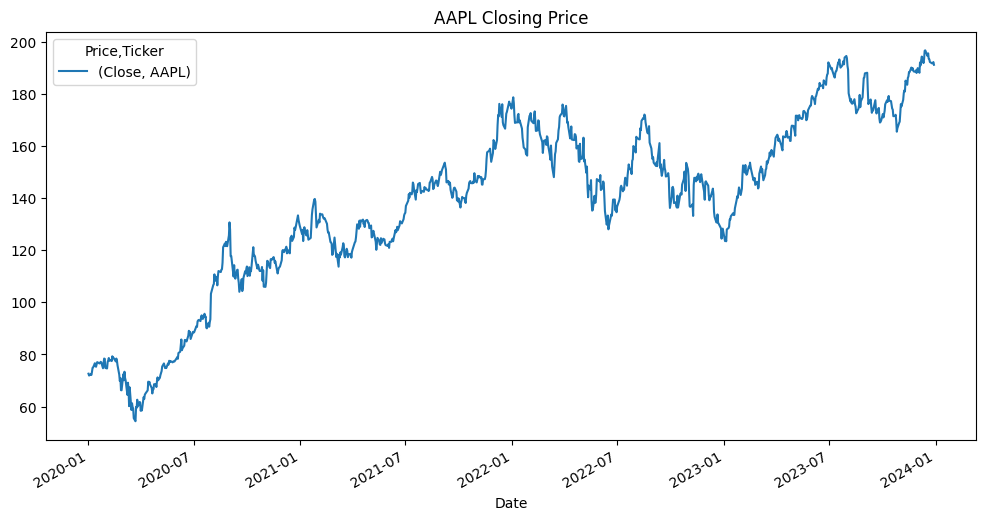

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for AAPL
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
data = data[['Close']]
data.dropna(inplace=True)
data.plot(figsize=(12,6), title='AAPL Closing Price')
plt.show()

## 2. Prepare Data for Rolling Forecast

In [17]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
print(f'Train size: {len(train)}, Test size: {len(test)}')

Train size: 804, Test size: 202


## 3. Rolling Forecast with ARIMA

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Use the correct column name for MultiIndex DataFrame
col = ('Close', 'AAPL')
history = list(train[col])
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[col].iloc[t])  # update history with actual value

## 4. Plot Prediction vs. Real Values (Rolling Forecast)

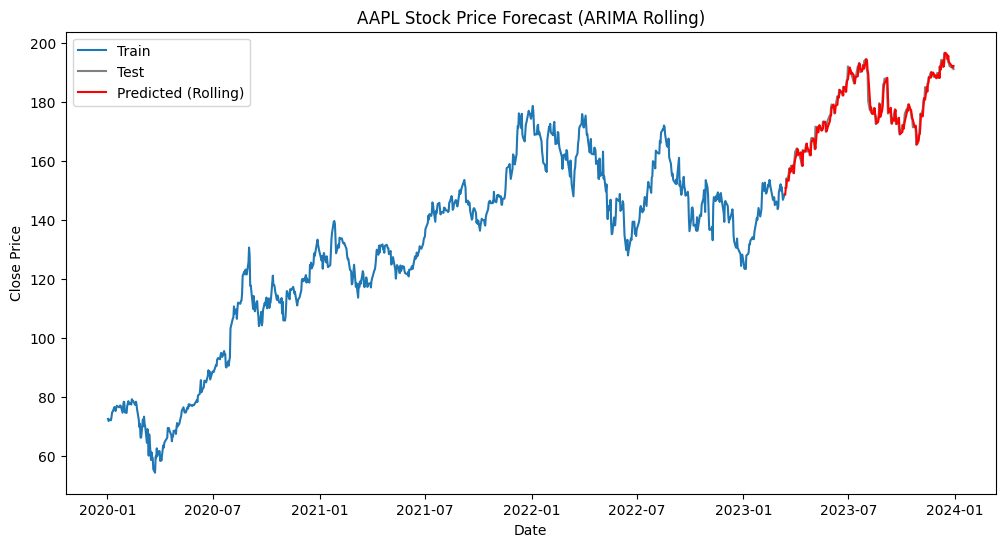

In [19]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test', color='gray')
plt.plot(test.index, predictions, label='Predicted (Rolling)', color='red')
plt.title('AAPL Stock Price Forecast (ARIMA Rolling)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 5. Evaluation Metrics: MAE and RMSE (Rolling Forecast)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test['Close'], predictions)
rmse = np.sqrt(mean_squared_error(test['Close'], predictions))
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 1.60
Root Mean Squared Error (RMSE): 2.11
